# Calculate geometric eigenmodes

To calculate the geometric eigenmodes of a brain surface using the method outlined in [Pang *et al.* 
 (2023)](https://doi.org/10.1038/s41586-023-06098-1), we will first initialize the solver with a
 path to a surface file. Since `nsbtools` provides triangular surface meshes for human, macaque, and 
 marmoset cortices, we can provide these as follows:

In [1]:
from nsbtools.io import fetch_surf
from nsbtools.eigen import EigenSolver
from nsbtools.utils import unmask
from nsbtools.plotting import plot_surf
from importlib.resources import files

# Load cortical surface mesh
lh_surf = fetch_surf()

# Initialize solver with surface
solver = EigenSolver(lh_surf['mesh'])

Note that by default, `load_surf` will populate a dictionary with the human left hemisphere fsLR-32k midthickness mesh and medial wall mask.

Next, we can compute the eigenmodes and eigenvalues by solving the eigenvalue problem of the Laplace-Beltrami
operator on the surface mesh:

In [2]:
emodes, evals = solver.solve()


By default, the solver computes the first 100 eigenmodes and corresponding eigenvalues, which are  
 then stored in the `emodes` and `evals` attributes. We can visualize a few modes via the 
 `plotting` module:

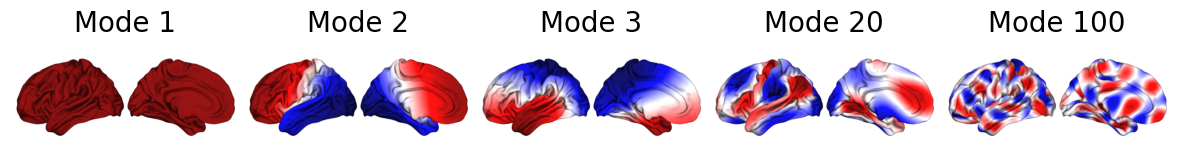

In [3]:
lh_surfpath = files('nsbtools.data') / 'sp-human_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
plot_surf(lh_surfpath, emodes[:,[0,1,2,19,99]], labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 20', 'Mode 100'], cmap='seismic_r')


We can see that the modes have been calculated, but incorrectly included the medial wall. To exclude
 the medial wall, we can either use a surface file that has the medial wall removed, or provide a 
 boolean mask when initializing the solver. The same mask is then provided to our `unmask` function 
 to reintroduce the medial wall for plotting. We can try this now with a marmoset surface:


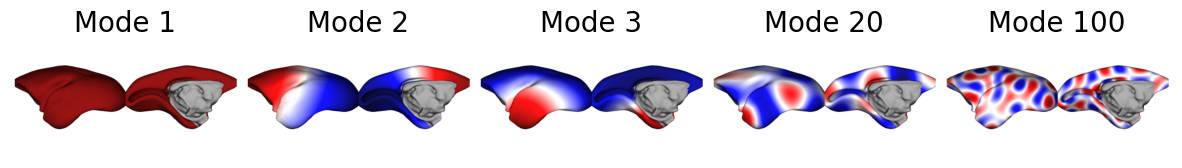

In [4]:
# Load medial wall mask
marmo_lh_surf = fetch_surf(species='marmoset')
marmo_solver = EigenSolver(marmo_lh_surf['mesh'], mask=marmo_lh_surf['medmask'])

# Solve the eigenvalue problem
marmo_emodes, marmo_evals = marmo_solver.solve()

# Visualize on the cortical surface
marmodes_unmasked = unmask(marmo_emodes[:,[0,1,2,19,99]], marmo_lh_surf['medmask'])
marmo_lh_surfpath = files('nsbtools.data') / 'sp-marmoset_tpl-fsLR_den-32k_hemi-L_midthickness.surf.gii'
plot_surf(marmo_lh_surfpath, marmodes_unmasked, labels=['Mode 1', 'Mode 2', 'Mode 3', 'Mode 20', 'Mode 100'], cmap='seismic_r')